In [89]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [90]:
import warnings
warnings.filterwarnings('ignore')

In [91]:
data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [92]:
pd.options.display.max_columns = None

# 1. Display Top 5 Rows of The Dataset

In [93]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# 2. Check Last 5 Rows of The Dataset

In [94]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


# 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [95]:
data.shape

(284807, 31)

In [96]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 284807
Number of Columns 31


In [97]:
#Checking the class distribution of the target variable
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

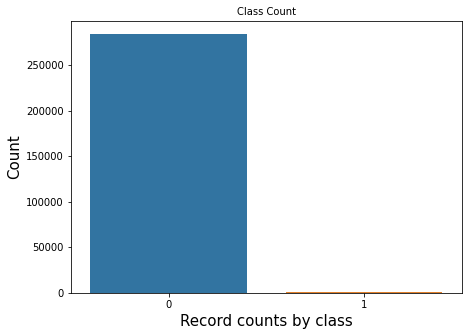

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize = (7,5))
sns.countplot(data['Class'])
plt.title("Class Count", fontsize = 10)
plt.xlabel("Record counts by class", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.show()

# 4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


<AxesSubplot:ylabel='Class'>

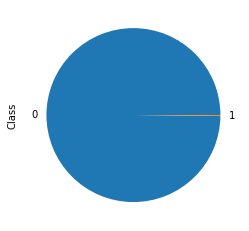

In [100]:
#Checking the class distribution of the target variable in %
print((data.groupby('Class')['Class'].count()/data['Class'].count())* 100)
((data.groupby('Class')['Class'].count()/data['Class'].count())* 100).plot.pie()

# 5. Check Null Values In The Dataset

In [101]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Feature Scaling

In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
sc = StandardScaler()
data['Amount']=sc.fit_transform(pd.DataFrame(data['Amount']))

In [104]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [105]:
data = data.drop(['Time'],axis=1)

In [106]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [107]:
data.shape

(284807, 30)

In [108]:
data.duplicated().any()

True

# Let's Remove Duplicated Values

In [109]:
data = data.drop_duplicates()

In [110]:
data.shape

(275663, 30)

In [111]:
284807- 275663

9144

# 6. Not Handling Imbalanced

In [112]:
data['Class'].value_counts()

0    275190
1       473
Name: Class, dtype: int64

In [113]:
import seaborn as sns

<AxesSubplot:xlabel='Class', ylabel='count'>

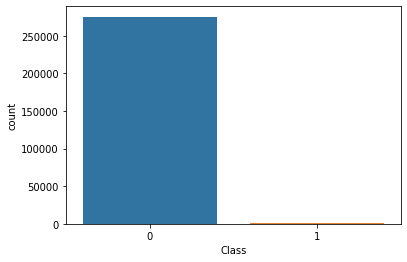

In [114]:
sns.countplot(data['Class'])

# 7. Store Feature Matrix In X And Response (Target) In Vector y

In [115]:
X = data.drop('Class',axis=1)
y = data['Class']

# 8. Splitting The Dataset Into The Training Set And Test Set

In [116]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=42)

# 9. Handling Imbalanced Dataset

# Undersampling

In [117]:
normal = data[data['Class']==0]
fraud = data[data['Class']==1]

In [118]:
normal.shape

(275190, 30)

In [119]:
fraud.shape

(473, 30)

In [120]:
normal_sample=normal.sample(n=473)

In [121]:
normal_sample.shape

(473, 30)

In [122]:
new_data = pd.concat([normal_sample,fraud],ignore_index=True)

In [123]:
new_data['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [124]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.850756,0.302512,-0.115641,1.153958,-0.158990,-0.572244,-0.024323,0.711729,-0.965834,-0.235809,0.710759,1.009233,0.555165,0.980464,0.340504,0.330664,-0.303295,0.721143,0.808613,-0.409843,0.197110,0.496161,0.335349,0.038991,-0.005489,-0.330687,-0.198906,-0.470945,-0.275107,0
1,-1.162814,1.413549,-2.539461,2.205024,3.446862,4.340611,-0.374712,-1.441811,-2.627627,0.323407,-0.972468,-0.246617,-0.599401,1.497376,-1.219427,0.284042,-0.279813,-0.534001,-1.353097,0.340369,-0.939172,1.139286,0.073987,0.710523,-0.798322,0.038388,0.204215,0.066001,0.021631,0
2,2.080331,0.238323,-2.036393,0.310970,0.886131,-0.461855,0.288554,-0.227700,0.601650,-0.645693,-0.877287,0.520518,0.986519,-1.121726,0.346089,0.197727,0.353352,-0.037050,0.214316,-0.096526,-0.359122,-0.861044,0.206568,-0.143278,0.018278,-0.570968,0.006293,-0.020423,-0.313289,0
3,1.086061,0.345490,1.157746,2.546333,-0.532168,-0.030497,-0.332531,0.144057,-0.387761,0.643557,-0.192890,-0.259804,-0.552230,0.237206,1.058423,0.574983,-0.328819,-0.381151,-1.698817,-0.207289,0.186452,0.518565,0.014342,0.396276,0.297258,0.107735,0.024752,0.029502,-0.310650,0
4,1.012734,-0.024259,1.014801,1.374117,-0.829041,-0.436778,-0.265560,0.043173,0.271132,-0.029865,0.206901,0.280238,-0.269573,0.242517,1.470527,0.029690,-0.124561,-0.381782,-1.198969,-0.081597,0.208895,0.541066,-0.015348,0.612629,0.326075,-0.309258,0.048775,0.043549,-0.109346,0


In [125]:
X = new_data.drop('Class',axis=1)
y = new_data['Class']

In [126]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=42)

# 10. Logistic Regression

In [127]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [128]:
y_pred1 = log.predict(X_test)

In [129]:
from sklearn.metrics import accuracy_score

In [130]:
accuracy_score(y_test,y_pred1)

0.9526315789473684

In [131]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [132]:
precision_score(y_test,y_pred1)

0.979381443298969

In [133]:
recall_score(y_test,y_pred1)

0.9313725490196079

In [134]:
f1_score(y_test,y_pred1)

0.9547738693467337

In [135]:
from sklearn.metrics import average_precision_score, precision_recall_curve

average_precision_score(y_test, y_pred1)

0.9490110965710212

# 11. Decision Tree Classifier

In [136]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [137]:
y_pred2 = dt.predict(X_test)

In [138]:
accuracy_score(y_test,y_pred2)

0.9263157894736842

In [139]:
precision_score(y_test,y_pred2)

0.94

In [140]:
recall_score(y_test,y_pred2)

0.9215686274509803

In [141]:
f1_score(y_test,y_pred2)

0.9306930693069307

In [142]:
from sklearn.metrics import average_precision_score, precision_recall_curve

average_precision_score(y_test, y_pred2)


0.9083797729618163

# 12. Random Forest Classifier

In [143]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [144]:
y_pred3 = rf.predict(X_test)

In [145]:
accuracy_score(y_test,y_pred3)

0.9368421052631579

In [146]:
precision_score(y_test,y_pred3)

0.9891304347826086

In [147]:
recall_score(y_test,y_pred3)

0.8921568627450981

In [148]:
f1_score(y_test,y_pred3)

0.9381443298969072

In [149]:
from sklearn.metrics import average_precision_score, precision_recall_curve

average_precision_score(y_test, y_pred3)


0.9403542423834522

In [150]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
              "ACC":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100
                    ]})

In [151]:
final_data

,Models,ACC
0,LR,95.263158
1,DT,92.631579
2,RF,93.684211


<AxesSubplot:xlabel='Models', ylabel='ACC'>

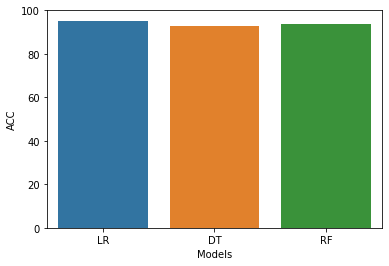

In [152]:
sns.barplot(final_data['Models'],final_data['ACC'])

# KNNS


In [186]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=16)

In [187]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=16)

In [ ]:
accuracy_score(y_test, y_pred_knn)

In [ ]:
precision_score(y_test,y_pred_knn)

In [ ]:
recall_score(y_test,y_pred_knn)

In [ ]:
f1_score(y_test,y_pred_knn)

In [ ]:
from sklearn.metrics import average_precision_score, precision_recall_curve
average_precision_score(y_test, y_pred_knn)


# Oversampling using SMOTE


In [153]:
X = data.drop('Class',axis=1)
y = data['Class']

In [154]:
X.shape

(275663, 29)

In [155]:
y.shape

(275663,)

In [156]:
from imblearn.over_sampling import SMOTE

In [157]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [158]:
y_res.value_counts()

0    275190
1    275190
Name: Class, dtype: int64

In [159]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,
                                                 random_state=42)

# 10. Logistic Regression

In [160]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [161]:
y_pred1 = log.predict(X_test)

In [162]:
accuracy_score(y_test,y_pred1)

0.9444474726552564

In [ ]:
precision_score(y_test,y_pred1)

In [164]:
recall_score(y_test,y_pred1)

0.9140046906532371

In [165]:
f1_score(y_test,y_pred1)

0.9426688292815556

In [166]:

from sklearn.metrics import average_precision_score, precision_recall_curve
average_precision_score(y_test, y_pred1)


0.9324696689884729

# 11. Decision Tree Classifier

In [167]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [168]:
y_pred2 = dt.predict(X_test)

In [169]:
accuracy_score(y_test,y_pred2)

0.9981739888804099

In [170]:
precision_score(y_test,y_pred2)

0.9975125281429298

In [171]:
recall_score(y_test,y_pred2)

0.9988364271039761

In [172]:
f1_score(y_test,y_pred2)

0.9981740386449732

In [173]:
from sklearn.metrics import average_precision_score, precision_recall_curve
average_precision_score(y_test, y_pred2)


0.9969332660776278

# 12. Random Forest Classifier

In [175]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [176]:
y_pred3 = rf.predict(X_test)

In [177]:
accuracy_score(y_test,y_pred3)

0.999918238308078

In [178]:
precision_score(y_test,y_pred3)

0.9998363993310551

In [179]:
recall_score(y_test,y_pred3)

1.0

In [180]:
f1_score(y_test,y_pred3)

0.9999181929736854

In [181]:
from sklearn.metrics import average_precision_score, precision_recall_curve
average_precision_score(y_test, y_pred3)


0.9998363993310551

In [ ]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
              "ACC":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100
                    ]})

In [ ]:
final_data

In [ ]:
sns.barplot(final_data['Models'],final_data['ACC'])

# Save The Model

In [ ]:
rf1 = RandomForestClassifier()
rf1.fit(X_res,y_res)

In [ ]:
import joblib

In [ ]:
joblib.dump(rf1,"credit_card_model")

In [ ]:
model = joblib.load("credit_card_model")

In [ ]:
pred = model.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

In [ ]:
if pred == 0:
    print("Normal Transcation")
else:
    print("Fraudulent Transcation")